In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import time
import numpy as np

from river import stats
from river.datasets import synth
from river import drift

from generators import Gaussian

import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)

n_instances = 20000
stream = np.concatenate(
    (
        np.random.uniform(low=0, high=1, size=n_instances),
        np.random.uniform(low=1, high=2, size=n_instances),
        np.random.uniform(low=0, high=1, size=n_instances)
    )
)

In [4]:
stream

array([0.37454012, 0.95071431, 0.73199394, ..., 0.30467486, 0.40736253,
       0.52283339])

In [5]:
np.mean(stream[1000:])

0.8387179578541673

In [6]:
mean = stats.Mean()
rolling_mean = stats.RollingMean(window_size=1000)
vals = []
rolling_vals = []
for i, t in enumerate(stream):
    vals.append(mean.update(t).get())
    rolling_vals.append(rolling_mean.update(t).get())

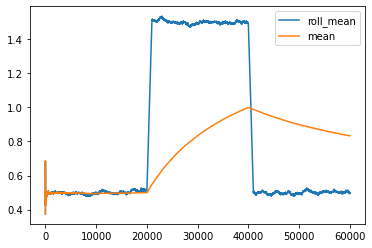

In [7]:
plt.plot(rolling_vals, label='roll_mean')
plt.plot(vals, label='mean')
plt.legend()

In [8]:
# stream = get_stream()
adwin = drift.ADWIN()
drift_pos = []

total_time = 0
for i, t in enumerate(stream):
    start = time.time()
    adwin.update(t)
    total_time += (time.time() - start)
    if adwin.drift_detected:
        print(f'Drift detected at {i}')
        drift_pos.append(i)
        
print("Total time:", total_time)

Drift detected at 20095
Drift detected at 40095
Total time: 0.09465551376342773


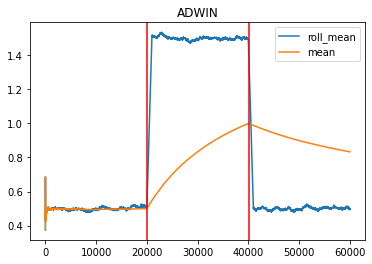

In [9]:
plt.plot(rolling_vals, label='roll_mean')
plt.plot(vals, label='mean')
plt.legend()
for x in drift_pos:
    plt.axvline(x, color='r')
plt.title('ADWIN')
plt.show()
plt.close()

In [10]:
from adwin import ADWIN

# stream = get_stream()
adwin = ADWIN(delta=.002, min_samples_test=20, max_buckets=7)
drift_pos = []

total_time = 0
for i, t in enumerate(stream):
    start = time.time()
    adwin.update(t)
    total_time += (time.time() - start)
    if adwin.drift_detected:
        print(f'Drift detected at {i}')
        drift_pos.append(i)

print("Total time:", total_time)

Drift detected at 20095
Drift detected at 40063
Total time: 0.498424768447876


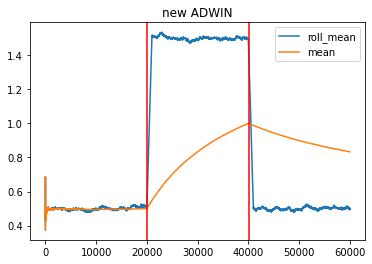

In [11]:
plt.plot(rolling_vals, label='roll_mean')
plt.plot(vals, label='mean')
plt.legend()
for x in drift_pos:
    plt.axvline(x, color='r')
plt.title('new ADWIN')
plt.show()
plt.close()